In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
# plt.rcParams["figure.figsize"] = (20,3)

In [2]:
fullData = pd.read_csv('humans.csv', header=0)
data = fullData[(fullData.ID != 2) & (fullData.ID != 9)]
persons = list(data.ID.unique())
elos = {'Normal': 2303.45, 'Fruit': 1962.68}
modes = ['Normal', 'Fruit']
N = len(data.ID)
colors = ['#2196F3', '#4CAF50', '#9C27B0', '#673ab7', '#795548', '#ffeb3b', '#E91E63', '#9C27B0', '#F44336']
data


,ID,Age,Kid,Training,Minmax,Fruit,PlayerStarts,GameN,Length,Human,AI,Score
0,1,52,0,0,1,0,1,1,99,4,6,0.0
1,1,52,0,0,1,0,1,2,94,6,9,0.0
2,1,52,0,0,1,0,1,3,126,5,7,0.0
3,1,52,0,0,1,0,1,4,109,6,7,0.0
4,1,52,0,0,1,0,1,5,134,9,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
155,10,20,0,4,1,1,0,1,39,9,3,1.0
156,10,20,0,4,1,1,0,2,38,1,12,0.0
157,10,20,0,4,1,1,0,3,77,9,10,0.0
158,10,20,0,4,1,1,0,4,61,3,9,0.0


In [3]:
def calculateElo(mask, Rb, biased=True):
    scores = data.Score[mask]
    if biased and len(scores) != 0:
        scores = np.concatenate((scores, [0.5]))
    Ea = scores.mean()
    if Ea <= 0:
        return 1000
    if Ea >= 1:
        return 3000
    return (math.log(10)*Rb - 400*math.log((-Ea + 1)/Ea))/math.log(10)

In [4]:
histElos = {'Normal': [], 'Fruit': []}
for person in persons:
    for fruit, mode in enumerate(modes):
        mask = (data.ID == person) & (data.Fruit == fruit)
        elo = calculateElo(mask, elos[mode])
        histElos[mode].append(elo)
        print(f"{mode}-elo for player {person}: {elo}")

Normal-elo for player 1: 2090.8584331830975
Fruit-elo for player 1: 1750.088433183098
Normal-elo for player 3: nan
Fruit-elo for player 3: 1433.7922821064324
Normal-elo for player 4: nan
Fruit-elo for player 4: 1642.0270615067334
Normal-elo for player 5: nan
Fruit-elo for player 5: 1433.7922821064324
Normal-elo for player 6: 1982.797061506733
Fruit-elo for player 6: 1994.3524984190499
Normal-elo for player 7: nan
Fruit-elo for player 7: 1771.831498112135
Normal-elo for player 8: 2239.569662852995
Fruit-elo for player 8: 1898.7996628529952
Normal-elo for player 10: 2112.601498112135
Fruit-elo for player 10: 1865.4647805254824


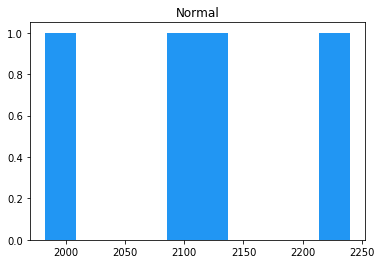

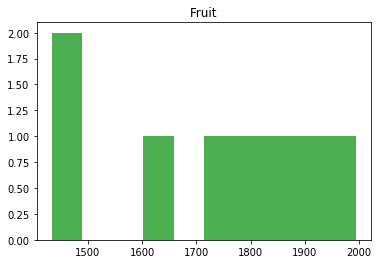

In [5]:
for fruit, mode in enumerate(modes):
    plt.hist(histElos[mode], color=colors[fruit])
    plt.title(mode)
    plt.show()

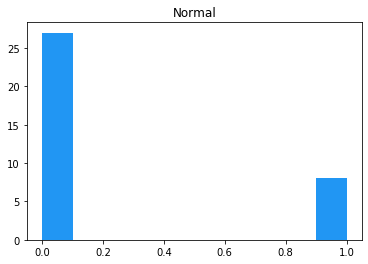

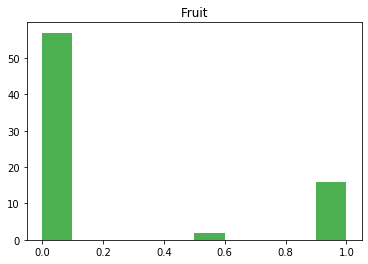

In [6]:
for fruit, mode in enumerate(modes):
    plt.hist(data[data.Fruit == fruit].Score, color=colors[fruit])
    plt.title(mode)
    plt.show()

In [7]:
for fruit, mode in enumerate(modes):
    print(f"{mode}-elo for player {person}: {calculateElo([True]*N, elos[mode], biased=False)}")

Normal-elo for player 10: 2090.8584331830975
Fruit-elo for player 10: 1750.088433183098
